In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
%matplotlib inline


In [3]:
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Preview the dataset
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
print(iris.target_names)


['setosa' 'versicolor' 'virginica']


In [11]:
# Clustering Algorithm Implementation

# A) KMeans Clustering
#KMeans is a popular unsupervised machine learning technique used to divide data into a specified number of clusters (`k`).The algorithm begins by initializing `k` centroids, typically selected at random.Each data point is then associated with the closest centroid based on distance.
#Once all points have been assigned, the centroids are updated to reflect the average position (mean) of the points within each cluster.  
#This process of reassigning points and adjusting centroids is repeated until the cluster assignments become stable and no further changes occur.


In [13]:
# Applying K Mean Clustering

import os
os.environ["OMP_NUM_THREADS"] = "1"

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df)
df['KMeans_Cluster'] = kmeans_labels



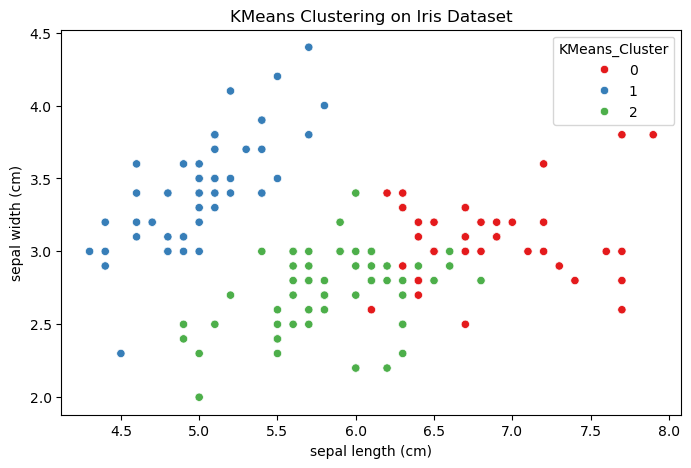

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1], hue=df['KMeans_Cluster'], palette='Set1')
plt.title("KMeans Clustering on Iris Dataset")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()


In [23]:
# Hierarchical Clustering

#Hierarchical clustering is a way to group similar data step by step to form a tree-like structure.There are two main ways to do this:
#In the bottom-up method (called agglomerative), each point starts in its own group, and similar groups are slowly combined together.
#In the top-down method (called divisive), all points start in one big group and are split apart gradually.
#This method works well for the Iris dataset because it helps us see how the data naturally forms groups, and we can visualize this clearly using a chart called a dendrogram.

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:, :4])


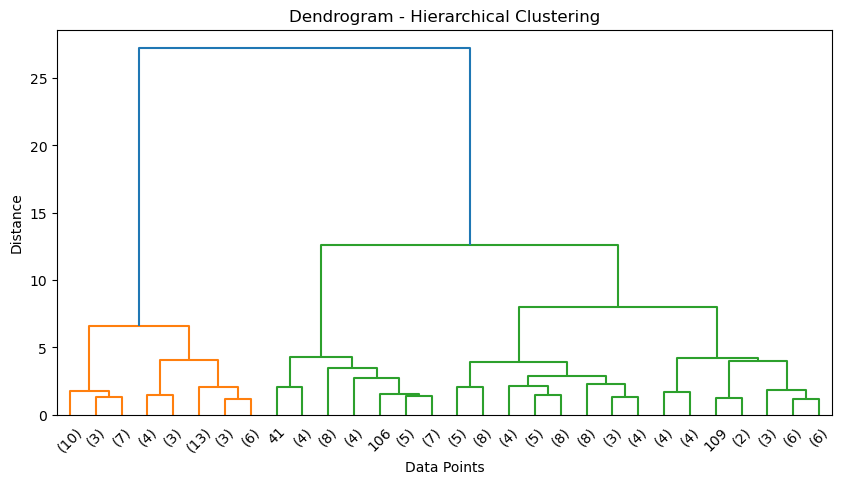

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(scaled_df, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='lastp', p=30)
plt.title("Dendrogram - Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


In [33]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3)
hc_labels = hc.fit_predict(scaled_df)

# Add to dataframe
df['HC_Cluster'] = hc_labels


In [35]:
# Visualize

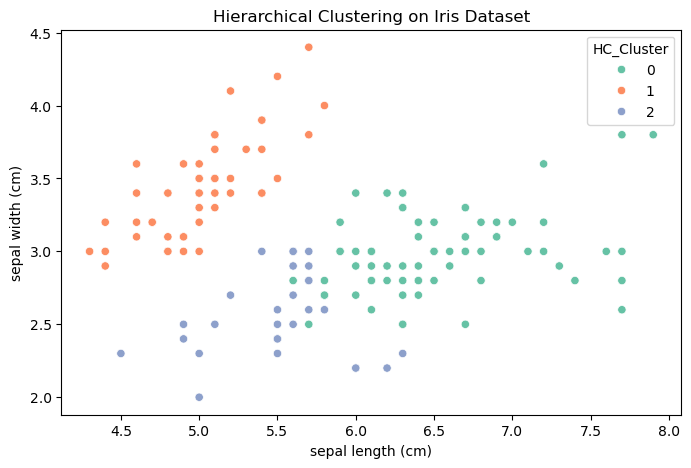

In [37]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1], hue=df['HC_Cluster'], palette='Set2')
plt.title("Hierarchical Clustering on Iris Dataset")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()
